# Problem Statement

We are given the medial insurance dataset of number of people living in USA from different regions. Our task is to predict 
the insurance cost.

* We will be solving this regression problem with the help of Dense Neural Networks

In [1]:
# Importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
# Loading the dataset
dataset=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Shape of the dataset
dataset.shape

(1338, 7)

In [4]:
# Checking for null values in each column
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no null values in the dataset 

In [5]:
# Summary of the quantitative attributes
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Checking the datatype of each attribute
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot: xlabel='age'>

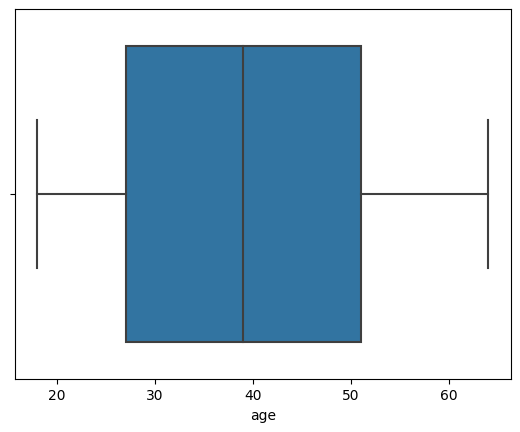

In [10]:
# Let's analysis "age" column
sns.boxplot(x=dataset["age"])

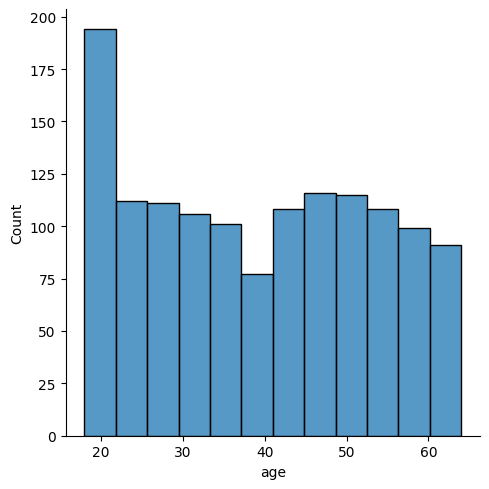

In [11]:
sns.displot(data=dataset["age"])

* Looks like "age" attribute is uniformally distributed and has no outliers

<AxesSubplot: xlabel='bmi'>

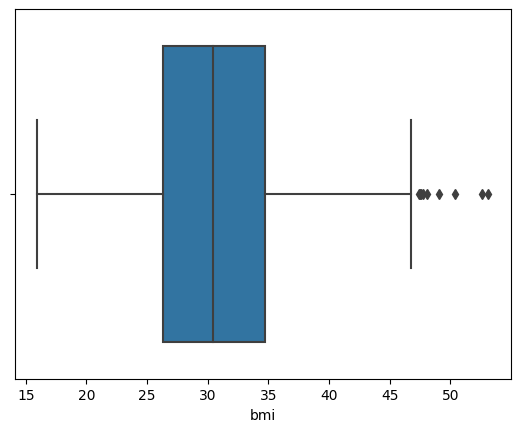

In [8]:
# Let's analysis "bmi" attribute
sns.boxplot(x=dataset["bmi"])

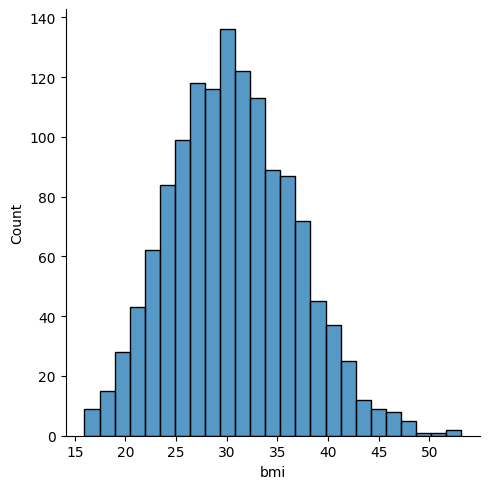

In [9]:
sns.displot(data=dataset["bmi"])

* Looks like "bmi" attribute has few outliers

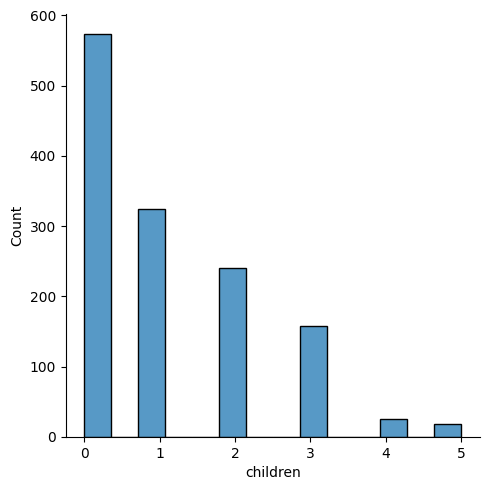

In [12]:
# Let's analysis "children" attribute
sns.displot(data=dataset["children"])

* 50% of the patients don't have childern

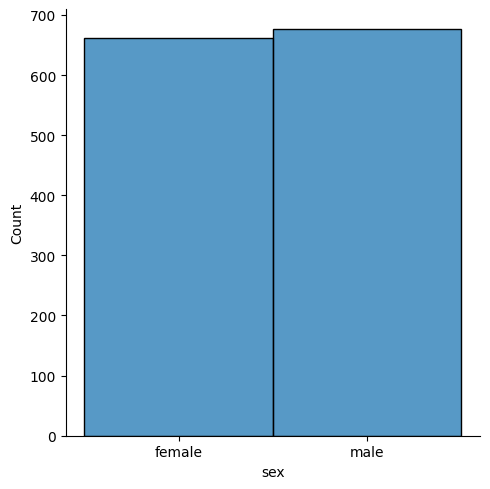

In [13]:
# Let's analysis "sex" attribute
sns.displot(data=dataset["sex"])

* Dataset has fairly equal number of "males" and "females"

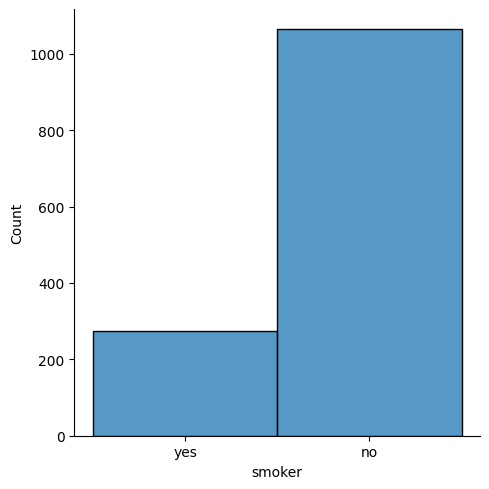

In [14]:
# Let's analysis "Smoker" attribute
sns.displot(data=dataset["smoker"])

* From above graph we can conclude that most of the patients does not smoke.

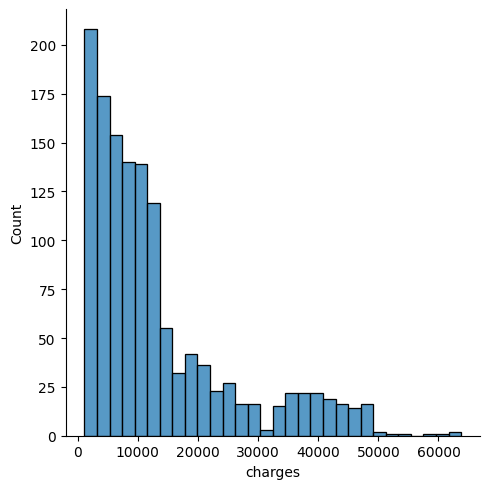

In [16]:
# Let's analysis our target attribute "charges"
sns.displot(data=dataset["charges"])

<AxesSubplot: xlabel='charges'>

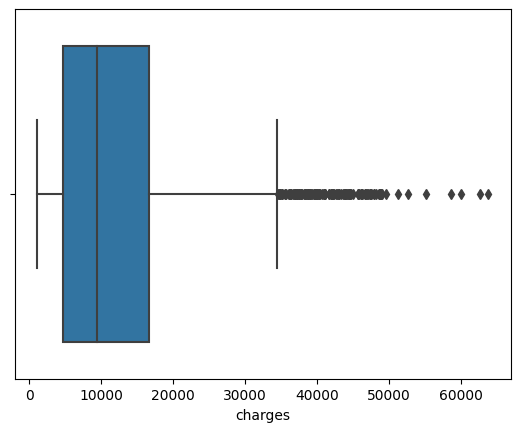

In [17]:
sns.boxplot(x=dataset["charges"])

* From above two graph we can conclude that our dataset is highly skewed

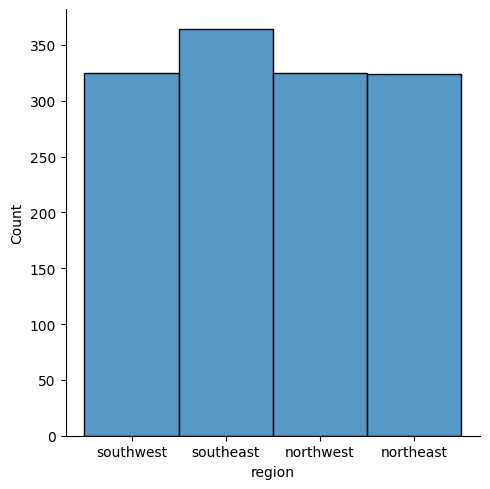

In [20]:
# Let's analysis "region" attribute
sns.displot(data=dataset["region"])

* From above graph we can conclude that "region" attribute is uniformally distributed 

In [22]:
# Let's draw the correlation matrix
dataset.corr()

C:\Users\Chetan\AppData\Local\Temp\ipykernel_17324\3103008423.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* From above matrix we can conclude that multi corrlearnity is absent among the different attributes. 

In [18]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing

In [23]:
y=dataset.iloc[:,-1]
X=dataset.iloc[:,:-1]

In [25]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


* Let's apply one-hot encoding on attributes "sex","children" and "smoker"

In [35]:
sex=pd.get_dummies(X["sex"]) #applying one-hot encoding on "sex" attribute
sex.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [36]:
smoke=pd.get_dummies(X["smoker"]).rename(columns={"no":"Doesn't_Smoke","yes":"Smoke"}) #applying one-hot encoding on "smoke" attribute
smoke.head()

,Doesn't_Smoke,Smoke
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [37]:
region=pd.get_dummies(X["region"]) #applying one-hot encoding on "region" attribute
region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [39]:
X=pd.concat([X,sex,smoke,region],axis=1) #Concatinating all the dataframes
X.head()

,age,sex,bmi,children,smoker,region,female,male,Doesn't_Smoke,Smoke,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,0,1,1,0,0,1,0,0


In [42]:
X.drop(['sex','smoker','region'],axis=1,inplace=True) #dropping those attributes on which one-hot encoding is applied
X.head()

,age,bmi,children,female,male,Doesn't_Smoke,Smoke,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [44]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [45]:
# Split data in training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [48]:
# Apply normalization on feature matrix
X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

In [49]:
X_train

,age,bmi,children,female,male,Doesn't_Smoke,Smoke,northeast,northwest,southeast,southwest
560,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1130,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1294,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
860,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
# Let's Create a Dense Neural Network

#Set random seed
tf.random.set_seed(42)

#1. Create a model
reg_model=tf.keras.Sequential([
    tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compiling model
reg_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

#3. Fit the model
reg_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.3994 - mae: 13345.3994
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6035 - mae: 13342.6035
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.6221 - mae: 13335.6221
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13314.8916 - mae: 13314.8916
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13251.0430 - mae: 13251.0430
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13052.4834 - mae: 13052.4834
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12437.0371 - mae: 12437.0371
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10942.4502 - mae: 10942.4502
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 9245.9170 - mae: 9245.9170
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8374.6318 

In [55]:
#Let's evaluate our model
reg_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2919.5398 - mae: 2919.5398


[2919.539794921875, 2919.539794921875]

In [56]:
print('Testing dataset mean=',y_test.mean())
print('Testing dataset median=',y_test.median())

Testing dataset mean= 12968.317062869404
Testing dataset median= 8487.8803


In [57]:
# Looks like our model is not performing well as the mean absolute error produced is around 3000. 
# Let's tweek our model and see if accuarcy improves

In [70]:
# Set random seed
tf.random.set_seed(42)

#1. Create the mdoel
reg_model_1=tf.keras.Sequential([ 
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
reg_model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=.01),
    metrics=['accuracy']
)

#3. Fit the model
reg_model_1_history=reg_model_1.fit(X_train,y_train,epochs=500)

Epoch 1/500


c:\Users\Chetan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


34/34 [==============================] - 1s 2ms/step - loss: 13137.4111 - accuracy: 0.0000e+00
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 8951.1328 - accuracy: 0.0000e+00
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 7399.5303 - accuracy: 0.0000e+00
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 5980.4722 - accuracy: 0.0000e+00
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 4067.9121 - accuracy: 0.0000e+00
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 3450.3389 - accuracy: 0.0000e+00
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 3319.6179 - accuracy: 0.0000e+00
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 3281.3496 - accuracy: 0.0000e+00
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 3216.3452 - accuracy: 0.0000e+00
Epoch 10/500
34/34 [==============================] - 0s 

In [61]:
# Evaluate the model
reg_model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1757.3235 - accuracy: 0.0000e+00


[1757.323486328125, 0.0]

In [63]:
# Let's make predictions on testing dataset
y_pred_1=reg_model_1.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [64]:
y_pred_1

array([[ 9113.089 ],
       [ 5245.7837],
       [30106.66  ],
       [ 9155.002 ],
       [26257.275 ],
       [ 4555.4927],
       [ 2105.8948],
       [14061.1045],
       [ 3720.4597],
       [10154.614 ],
       [17987.648 ],
       [ 7165.1733],
       [ 3890.2434],
       [54036.496 ],
       [56288.492 ],
       [47810.234 ],
       [ 9749.181 ],
       [42649.473 ],
       [ 8168.84  ],
       [22555.166 ],
       [ 5082.4116],
       [ 7398.896 ],
       [ 1254.4624],
       [ 2727.5525],
       [11045.593 ],
       [10911.026 ],
       [12724.117 ],
       [ 5140.2183],
       [ 9721.683 ],
       [ 1116.8832],
       [ 8297.192 ],
       [11757.312 ],
       [ 2000.666 ],
       [ 5672.572 ],
       [ 2897.1973],
       [ 7315.063 ],
       [ 2617.0247],
       [ 7355.535 ],
       [23941.379 ],
       [36632.273 ],
       [ 4712.448 ],
       [ 2600.5828],
       [11751.449 ],
       [12003.778 ],
       [ 4814.3203],
       [12327.487 ],
       [ 3614.3806],
       [ 4448

In [66]:
# Calculating the residuals
residual_1=y_test-tf.squeeze(y_pred_1)

Text(0, 0.5, 'Predicted')

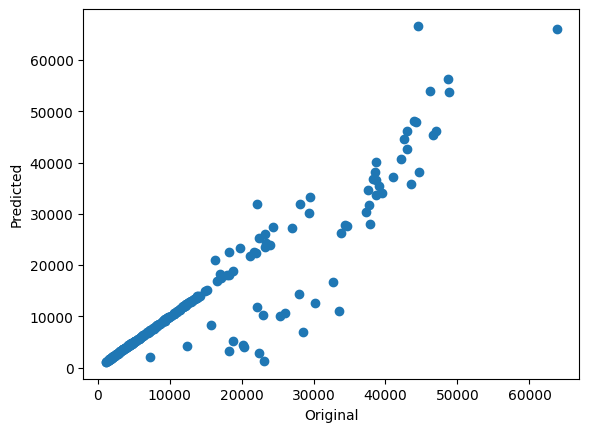

In [67]:
# Let's draw  a scatter plot between predicted and orginal values
plt.scatter(y_test,y_pred_1)
plt.xlabel('Original')
plt.ylabel('Predicted')

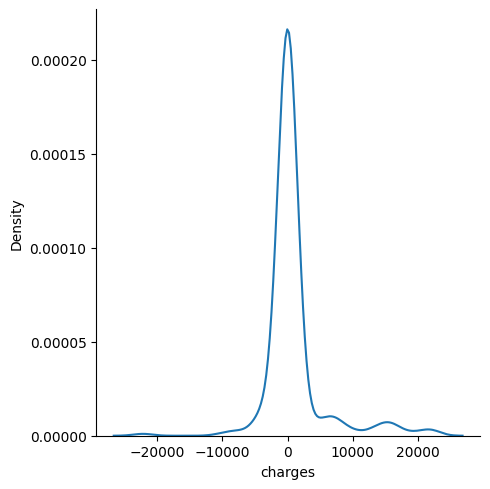

In [68]:
# Let's create a density plot for the residuals
sns.displot(residual_1,kind='kde')

Text(0, 0.5, 'Residual')

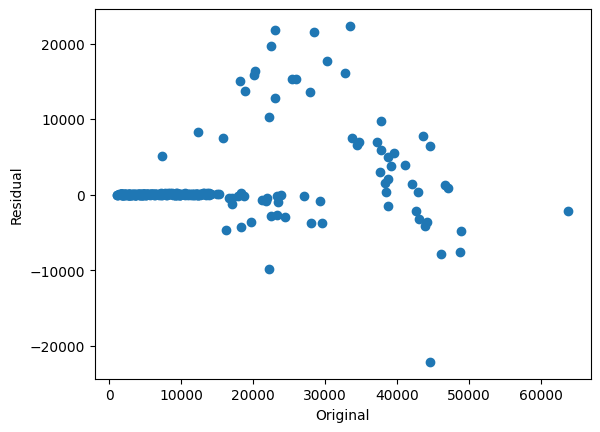

In [69]:
# Let's create a scatter plot for the residuals and y_test
plt.scatter(y_test,residual_1)
plt.xlabel('Original')
plt.ylabel('Residual')

Text(0, 0.5, 'Loss')

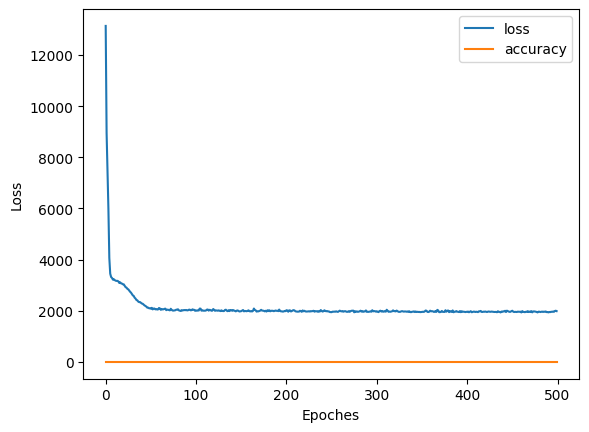

In [71]:
# Plotting the loss curve
pd.DataFrame(reg_model_1_history.history).plot()
plt.xlabel('Epoches')
plt.ylabel('Loss')